In [297]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image


In [298]:
#  Use pandas to read in the data
df = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')[0]
df.head()


,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,16,11,4,1,36,15,21,37,2.31,32.1,19.7,12.4,0.77,W D W W W,50573,Mohamed Salah - 11,Alisson,NaN
1,2,Arsenal,16,11,3,2,33,15,18,36,2.25,29.0,12.1,16.9,1.06,W W W W L,60147,"Eddie Nketiah, Bukayo Saka - 5",David Raya,NaN
2,3,Aston Villa,16,11,2,3,35,20,15,35,2.19,28.8,22.2,6.6,0.41,W W D W W,36211,Ollie Watkins - 8,Emiliano Martínez,NaN
3,4,Manchester City,16,10,3,3,38,18,20,33,2.06,30.6,14.7,15.8,0.99,D D D L W,45700,Erling Haaland - 14,Ederson,NaN
4,5,Tottenham,16,9,3,4,33,23,10,30,1.88,27.5,26.8,0.7,0.05,L L D L W,61581,Son Heung-min - 10,Guglielmo Vicario,NaN


In [299]:
#  Add a column to the dataframe with the path to the logo

df['badge'] = df['Squad'].apply(lambda x: f'./Club Logos/{x}.png')


In [300]:
df = df[['Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD']]
df.head()

,Rk,badge,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD
0,1,./Club Logos/Liverpool.png,Liverpool,16,11,4,1,36,15,21,37,2.31,32.1,19.7,12.4
1,2,./Club Logos/Arsenal.png,Arsenal,16,11,3,2,33,15,18,36,2.25,29.0,12.1,16.9
2,3,./Club Logos/Aston Villa.png,Aston Villa,16,11,2,3,35,20,15,35,2.19,28.8,22.2,6.6
3,4,./Club Logos/Manchester City.png,Manchester City,16,10,3,3,38,18,20,33,2.06,30.6,14.7,15.8
4,5,./Club Logos/Tottenham.png,Tottenham,16,9,3,4,33,23,10,30,1.88,27.5,26.8,0.7


In [301]:
# Updated colors for a modern look with a black background
bg_color = "#FFFFFF"  # Black for a bold and modern background

# Text color should be light for contrast against the black background
text_color = "#000000"  # White for high contrast and readability

# Row colors that complement a black background with more subdued tones
row_colors = {
    "top4": "#6DB67B",  # Muted green for top 4, less bright
    "top6": "#D4AC0D",  # Deeper yellow for top 6, not too light
    "relegation": "#DD6A74",  # Soft red for relegation, less intense
    "even": "#424242",  # Darker gray for even rows, subtle against black
    "odd": "#616161"  # Medium gray for odd rows, provides slight contrast
}



#default rcParams
plt.rcParams['text.color'] = text_color
plt.rcParams['font.family'] = "monospace"

In [302]:
col_defs = [
	ColumnDefinition(
		name = "Rk",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "badge",
		textprops = {"ha" : "center", "va" : "center", "color" : bg_color},
		width = 0.5,
		plot_fn = image
		),
	ColumnDefinition(
		name = "Squad",
		textprops = {"ha" : "left", "weight" : "bold"},
		width = 2
		),
	ColumnDefinition(
		name = "MP",
		group = "Matches",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "W",
		group = "Matches",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "D",
		group = "Matches",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "L",
		group = "Matches",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "GF",
		group = "Goals",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "GA",
		group = "Goals",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "GD",
		group = "Goals",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "Pts",
		group = "Points",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "Pts/MP",
		group = "Points",
		textprops = {"ha" : "center"},
		width = 0.5
		),
	ColumnDefinition(
		name = "xG",
		group = "Expected Goals",
		textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xG"], cmap=matplotlib.cm.RdYlGn, num_stds=2),
		),
	ColumnDefinition(
		name = "xGA",
		group = "Expected Goals",
		textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
		cmap=normed_cmap(df["xGA"], cmap=matplotlib.cm.RdYlGn_r, num_stds=2)
		),
	ColumnDefinition(
		name = "xGD",
		group = "Expected Goals",
		textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
		cmap=normed_cmap(df["xGD"], cmap=matplotlib.cm.RdYlGn, num_stds=2)
		)
]

		

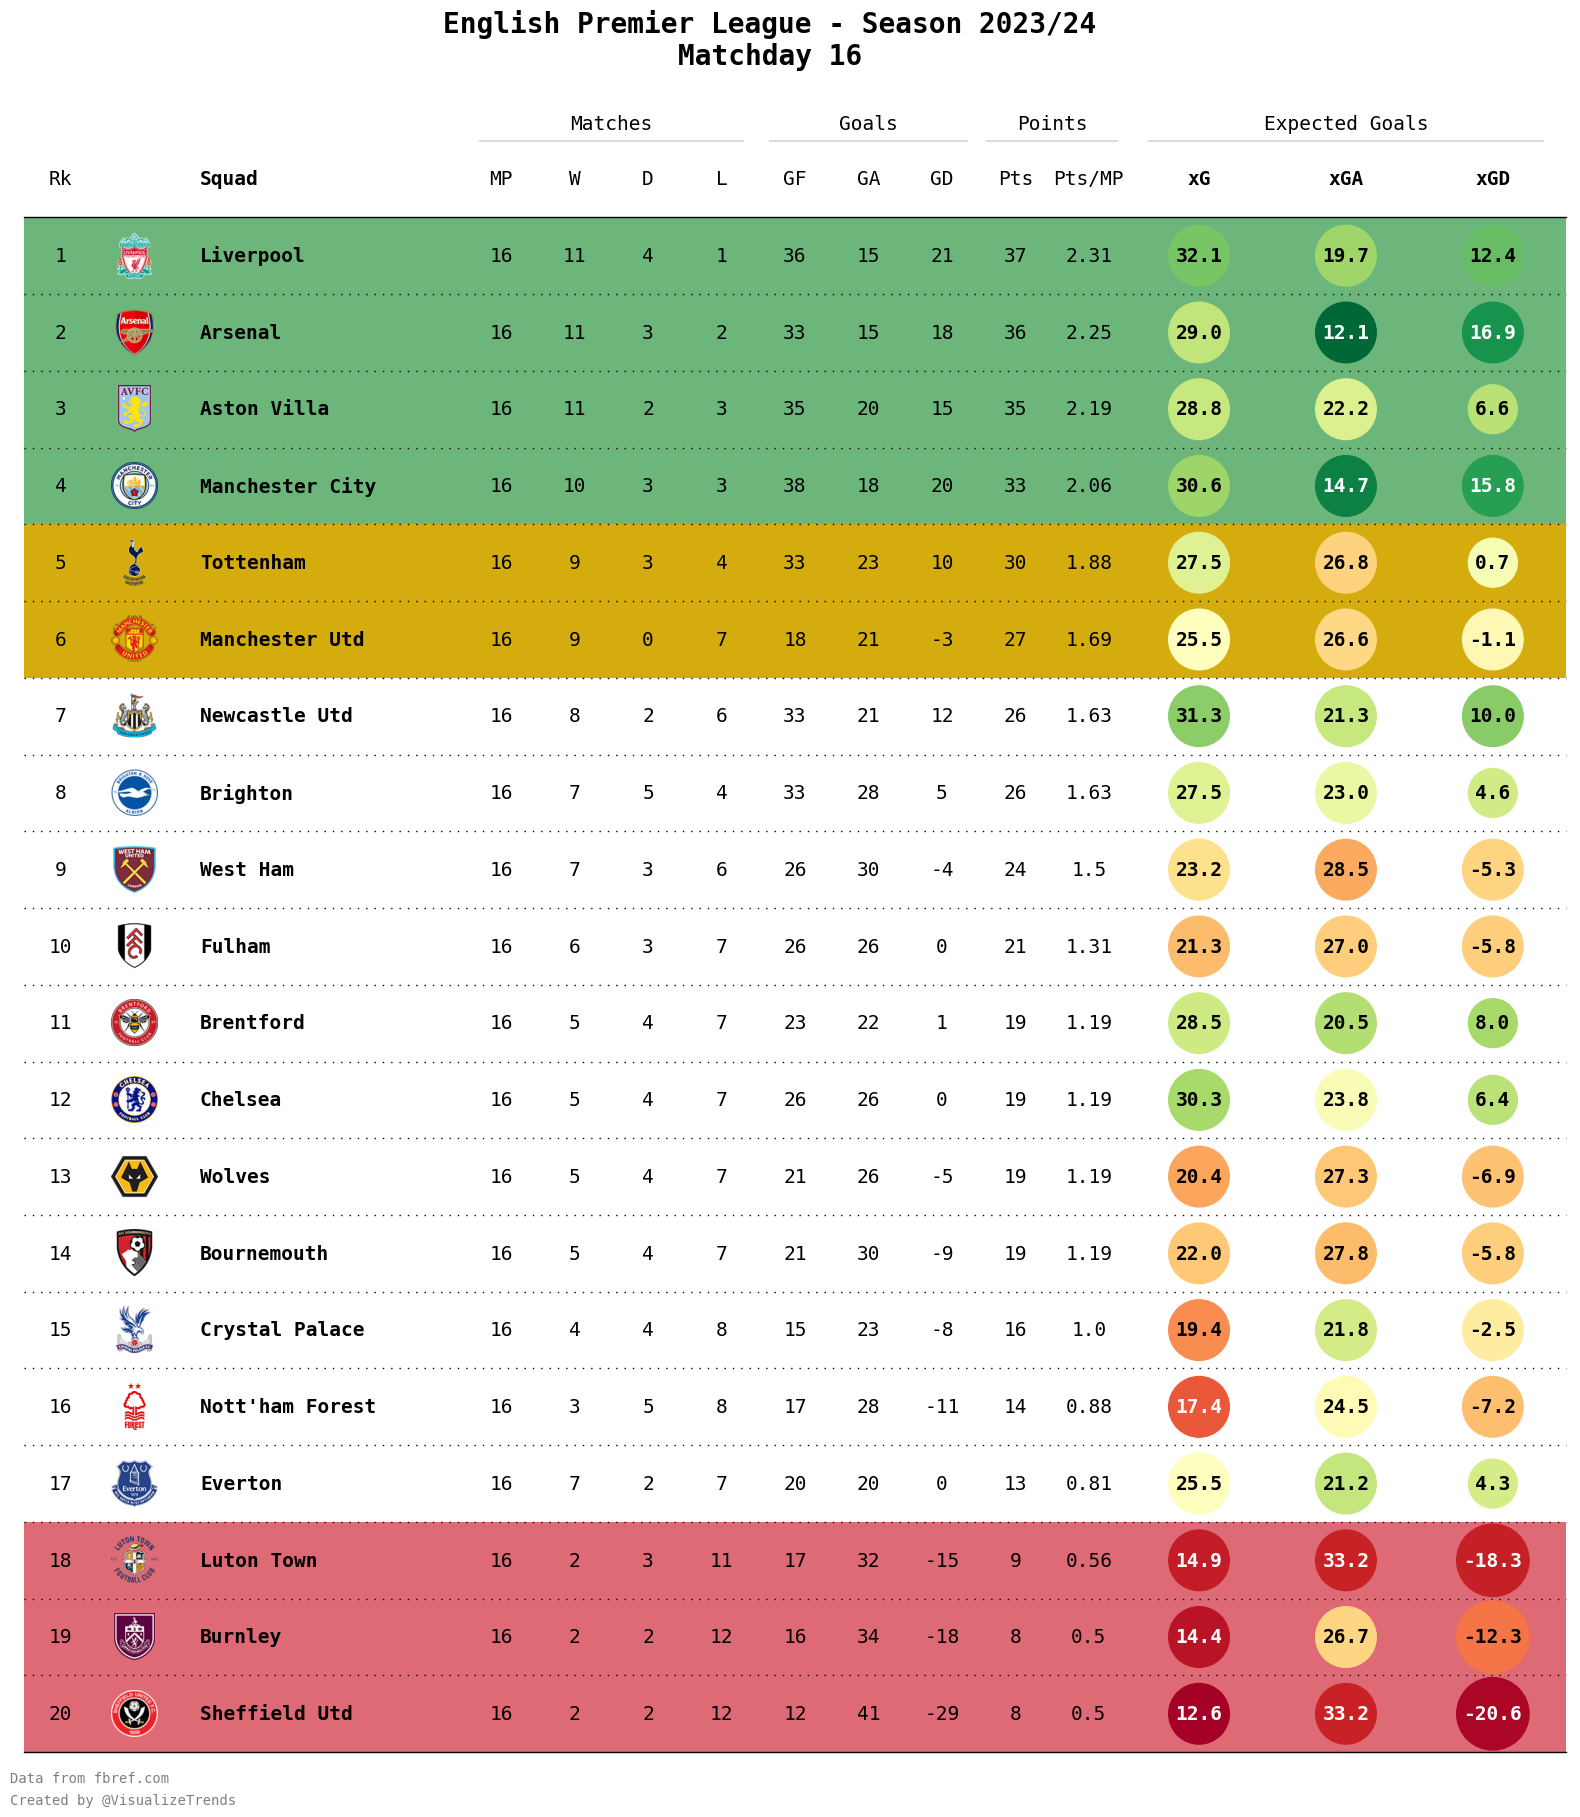

In [304]:
#Table creation
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-" },
    column_border_kw={"linewidth": 2, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) 

for idx in [0, 1, 2, 3]:
    table.rows[idx].set_facecolor(row_colors["top4"])
    
for idx in [4, 5]:
    table.rows[idx].set_facecolor(row_colors["top6"])

for idx in [17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["relegation"])

matchday = df['MP'].iloc[0]

fig.text(
    0.5,
    0.89,
    f"English Premier League - Season 2023/24" + "\n" + f"Matchday {matchday}", 
    color=text_color,
    ha="center",
    va="center",
    fontsize=20,
    fontweight="bold"
)

footer_y_position = .1  # Adjust this value as needed

# Add 'Created by Visualize Trends' text as footer
plt.figtext(0.12, footer_y_position - 0.01, "Created by @VisualizeTrends", color='Grey', fontsize=10, ha="left", va="center")

# Add 'Data from fbref.com' text as footer
plt.figtext(0.12, footer_y_position , "Data from fbref.com", color='Grey', fontsize=10, ha="left", va="center")

# Save the figure
fig.savefig(f"EPL_Matchday_{matchday}.png", bbox_inches="tight", facecolor=bg_color)

# Footer